Week2: Shakespeare
==================

Cargamos las obras completas de Shakespeare y obtenemos algunos datos sobre las mismas como la cantidad de registros, los primeros registros, etc.


In [1]:
lista = [('a',3),('b',5),('a',6)]
rdd1 = sc.parallelize(lista,2)
rdd1.collect()
print rdd1.reduce(lambda x,y:x+y)

('a', 3, 'b', 5, 'a', 6)


In [11]:
import os.path

shakespeareRDD = sc.textFile('data/shakespeare/pg135.txt', 8)
#shakespeareRDD = shakespeareRDD.zipWithIndex()
print shakespeareRDD.count()  
shakespeareRDD.take(15)  

68116


[u'The Project Gutenberg EBook of Les Miserables, by Victor Hugo',
 u'',
 u'This eBook is for the use of anyone anywhere at no cost and with',
 u'almost no restrictions whatsoever.  You may copy it, give it away or',
 u're-use it under the terms of the Project Gutenberg License included',
 u'with this eBook or online at www.gutenberg.org',
 u'',
 u'',
 u'Title: Les Miserables',
 u'       Complete in Five Volumes',
 u'',
 u'Author: Victor Hugo',
 u'',
 u'Translator: Isabel F. Hapgood',
 u'']

In [10]:
import re,string
def removePunctuation(text):
    """Removes punctuation, changes to lowercase, and strips leading and trailing spaces.

    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated. (e.g. it's becomes its)

    Args:
        text (str): A string.

    Returns:
        str: The cleaned up string.
    """
    #exclude = set(string.punctuation)
    #text = ''.join(ch for ch in text if ch not in exclude)
    text=text.lower().strip(' ')
    text=re.sub(r'[^a-zA-Z0-9 ]', '', text)   
    return text
print removePunctuation('Hi, you!?    \n\tmmm')

shakespeareRDD = shakespeareRDD.map(removePunctuation)
shakespeareRDD.take(15)  

hi you    mmm


[u'the project gutenberg ebook of les miserables by victor hugo',
 u'',
 u'this ebook is for the use of anyone anywhere at no cost and with',
 u'almost no restrictions whatsoever  you may copy it give it away or',
 u'reuse it under the terms of the project gutenberg license included',
 u'with this ebook or online at wwwgutenbergorg',
 u'',
 u'',
 u'title les miserables',
 u'complete in five volumes',
 u'',
 u'author victor hugo',
 u'',
 u'translator isabel f hapgood',
 u'']

Ahora vamos a procesar el RDD realizando un split para obtener las palabras.
Filtramos las palabras que son demasiado cortas.

In [11]:
wordsRDD = shakespeareRDD.flatMap(lambda x:x.split())
wordsRDD = wordsRDD.filter(lambda x: len(x)>0)
wordsRDD.take(15)

[u'the',
 u'project',
 u'gutenberg',
 u'ebook',
 u'of',
 u'les',
 u'miserables',
 u'by',
 u'victor',
 u'hugo',
 u'this',
 u'ebook',
 u'is',
 u'for',
 u'the']

Obtenemos la frecuencia de las palabras

In [12]:
freqsRDD = wordsRDD.map(lambda x:(x,1))
#print freqsRDD.take(10)
#total = freqsRDD.map(lambda x:x[1]).reduce(lambda x,y:x+y)
total=freqsRDD.count()
print "Total frequency:"+str(total)
#freqsRDD = wordsRDD.map(lambda x:(x,1))
#freqsRDD = freqsRDD.reduceByKey(lambda x,y:x+y).map(lambda x:(x[0],100*float(x[1])/total))
freqsRDD = freqsRDD.reduceByKey(lambda x,y:x+y)
print freqsRDD.take(10)
#freqsRDD = freqsRDD.reduceByKey(lambda x,y:x+y)
freqsRDD.takeOrdered(15,lambda x:-x[1])

Total frequency:567954
[(u'aided', 4), (u'funereal', 19), (u'promenade', 10), (u'elegances', 2), (u'resist', 14), (u'messalinas', 1), (u'everybody', 17), (u'four', 345), (u'catch', 37), (u'consists', 18)]


[(u'the', 40846),
 (u'of', 19924),
 (u'and', 14877),
 (u'a', 14485),
 (u'to', 13705),
 (u'in', 11183),
 (u'he', 9580),
 (u'was', 8613),
 (u'that', 7768),
 (u'it', 6475),
 (u'his', 6459),
 (u'is', 6184),
 (u'had', 6171),
 (u'which', 5138),
 (u'with', 4525)]

In [13]:
# Create a list of StopWords
stopWords = freqsRDD.takeOrdered(40,lambda x:-x[1])
stopWords = [s[0] for s in stopWords]
print stopWords

[u'the', u'of', u'and', u'a', u'to', u'in', u'he', u'was', u'that', u'it', u'his', u'is', u'had', u'which', u'with', u'on', u'at', u'this', u'not', u'you', u'i', u'as', u'one', u'for', u'him', u'have', u'her', u'there', u'who', u'all', u'from', u'she', u'be', u'by', u'are', u'an', u'they', u'but', u'no', u'man']


[u'the', u'of', u'and', u'a', u'to', u'in', u'he', u'was', u'that', u'it', u'his', u'is', u'had', u'which', u'with', u'on', u'at', u'this', u'not', u'you', u'i', u'as', u'one', u'for', u'him', u'have', u'her', u'there', u'who', u'all', u'from', u'she', u'be', u'by', u'are', u'an', u'they', u'but', u'no', u'man', u'were', u'what', u'said', u'been', u'when', u'marius', u'we', u'their', u'will', u'two']
[40846, 19924, 14877, 14485, 13705, 11183, 9580, 8613, 7768, 6475, 6459, 6184, 6171, 5138, 4525, 4462, 4055, 3971, 3799, 3661, 3634, 3253, 3127, 2964, 2923, 2793, 2633, 2615, 2540, 2451, 2447, 2428, 2389, 2382, 2159, 2116, 2113, 2043, 1967, 1899, 1824, 1796, 1791, 1517, 1362, 1352, 1278, 1252, 1226, 1183]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


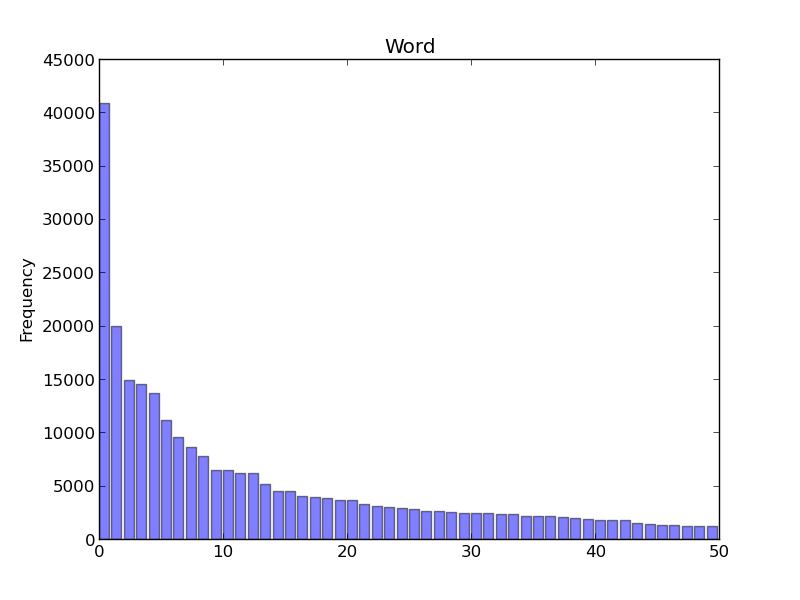

In [14]:
# ploteamos la distribucion de las palabras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

my_freqs = freqsRDD.takeOrdered(50,lambda x:-x[1])
my_words = [i for i,j in my_freqs]
my_freqs = [j for i,j in my_freqs]

print my_words
print my_freqs

plt.close()
plt.clf()

y_pos = np.arange(len(my_words))
print y_pos
plt.bar(y_pos, my_freqs, alpha=0.5)
#plt.xticks(y_pos, my_words)
plt.ylabel('Frequency')
plt.title('Word')
 
plt.savefig('foobar2.png')
Image("foobar2.png")



Ahora buscamos los bigramas mas populares.

In [15]:
def text2bigrams(s):
    r = []
    l = s.split()
    for i in range(0,len(l)-1):
        r.append((l[i],l[i+1]))
    return r
print text2bigrams('hola que tal a todos')
bigramsRDD = shakespeareRDD.flatMap(text2bigrams)
print bigramsRDD.take(10)
bigramsFreq = bigramsRDD.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y)
bigramsFreq.takeOrdered(15,lambda x:-x[1])

[('hola', 'que'), ('que', 'tal'), ('tal', 'a'), ('a', 'todos')]
[(u'the', u'project'), (u'project', u'gutenberg'), (u'gutenberg', u'ebook'), (u'ebook', u'of'), (u'of', u'les'), (u'les', u'miserables'), (u'miserables', u'by'), (u'by', u'victor'), (u'victor', u'hugo'), (u'this', u'ebook')]


[((u'of', u'the'), 5214),
 ((u'in', u'the'), 3555),
 ((u'on', u'the'), 1911),
 ((u'to', u'the'), 1753),
 ((u'he', u'had'), 1432),
 ((u'at', u'the'), 1312),
 ((u'it', u'was'), 1207),
 ((u'of', u'a'), 1150),
 ((u'it', u'is'), 1148),
 ((u'and', u'the'), 1110),
 ((u'he', u'was'), 1086),
 ((u'jean', u'valjean'), 961),
 ((u'in', u'a'), 836),
 ((u'from', u'the'), 806),
 ((u'to', u'be'), 785)]

In [16]:
# Bigrams without StopWords
bigramsFiltered = bigramsFreq.filter(lambda x:x[0][0] not in stopWords and x[0][1] not in stopWords).filter(lambda x:len(x[0][0])>3 and len(x[0][1])>3)
bigramsFiltered.takeOrdered(15,lambda x:-x[1])

[((u'jean', u'valjean'), 961),
 ((u'each', u'other'), 212),
 ((u'more', u'than'), 175),
 ((u'once', u'more'), 164),
 ((u'moment', u'when'), 104),
 ((u'same', u'time'), 97),
 ((u'young', u'girl'), 66),
 ((u'madame', u'magloire'), 64),
 ((u'jean', u'valjeans'), 59),
 ((u'thousand', u'francs'), 58),
 ((u'know', u'what'), 57),
 ((u'hundred', u'francs'), 55),
 ((u'rather', u'than'), 55),
 ((u'caught', u'sight'), 49),
 ((u'dont', u'know'), 49)]

In [17]:
# Palabras menos usadas 
print freqsRDD.takeOrdered(10,lambda x:x[1])

[(u'messalinas', 1), (u'originality', 1), (u'auscultation', 1), (u'isome', 1), (u'wellarmed', 1), (u'thenardierwhich', 1), (u'parcroyal', 1), (u'ryssel', 1), (u'pestilential', 1), (u'atiger', 1)]
